In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from yellowbrick.regressor import ResidualsPlot

In [6]:
df = pd.read_csv('../../../data/kc_house_data.csv')

### Joel's mrmodel

In [10]:
#this code is heavily borrowed from Joel Collins' solution for the Kaggle exercise
#input for model is previously calculated X_train, etc. data AND list of features from X_train
#to use the model, only change the features & rely on former X_train, etc.
def mrmodel(X_train, X_test, y_train, y_test, features):
    # Isolate the features for the model
    model_train = X_train[features]
    model_test = X_test[features]
    
    # Initialize a model
    model = LinearRegression()
    
    # Fit the model
    model.fit(model_train, y_train)
    
    # Generate training and test predictions
    train_preds = model.predict(model_train)
    test_preds = model.predict(model_test)
    
    # Calculate training and test error
    train_error = mean_squared_error(y_train, train_preds, squared=False)
    test_error = mean_squared_error(y_test, test_preds, squared=False)
    
    # return results
    difference = test_error - train_error
    print('train error', train_error)
    print('test error', test_error)
    print(f'difference: {difference}')

    r_sq = model.score(model_train, y_train)
    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    #intercept: 5.633333333333329
    model_info = pd.DataFrame([('intercept', model.intercept_)] + list(zip(model_train.columns, model.coef_)), columns=['feature', 'weight'])
    
    print(model_info)
    return model, model_train, model_test #note: this produces an array of outputs that need to be indexed

### residualizer

In [11]:
def residualizer(model, model_train, model_test, y_train, y_test):
    # this requires the yellowbrick api, which is called by...
    # from yellowbrick.regressor import ResidualsPlot
    # Instantiate the visualizer
    visualizer = ResidualsPlot(model)
    visualizer.fit(model_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(model_test, y_test)  # Evaluate the model on the test data
    return visualizer.show()                 # Finalize and render the figure

### plot bins

In [12]:
def plot_bins(model, X, y, bins=10, title='binned error'):
    q=pd.qcut(y, bins) #magical pandas function, makes quantiles (10 in this case)
    frame=pd.DataFrame(q) #takes cuts into a df so you can do groupby later
    frame['error']=model.predict(X)-y #estimates error
    frame.columns = ['bins', 'errors'] #reset column names
    avg=frame.groupby('bins').mean()
    avg['std']=frame.groupby('bins').std().iloc[:,0]
    avg.rename(columns={'bins':'mean'}, inplace=True)
    avg.plot(kind='bar', figsize=(15,6), title=title)

### sale_reg - combines all 3 functions

In [16]:
#needs input of features, model name, and X_train, X_test, etc
def sale_reg(X_train, X_test, y_train, y_test, features):
    mrmodel_outputs = mrmodel(X_train, X_test, y_train, y_test, model_features) #saves the 3 outputs of mrmodel
    residualizer(mrmodel_outputs[0], mrmodel_outputs[1], mrmodel_outputs[2], y_train, y_test)
    plot_bins(mrmodel_outputs[0], mrmodel_outputs[2], y_test)

### example call of sale_reg

train error 262419.7884333472
test error 259878.49234916252
difference: -2541.2960841846652
coefficient of determination: 0.4886786453279144
intercept: -47377.18949402089
       feature        weight
0    intercept -47377.189494
1  sqft_living    281.862853


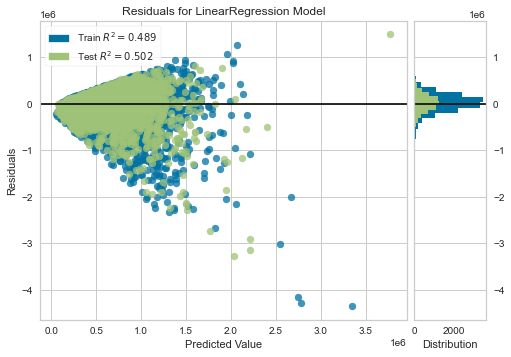

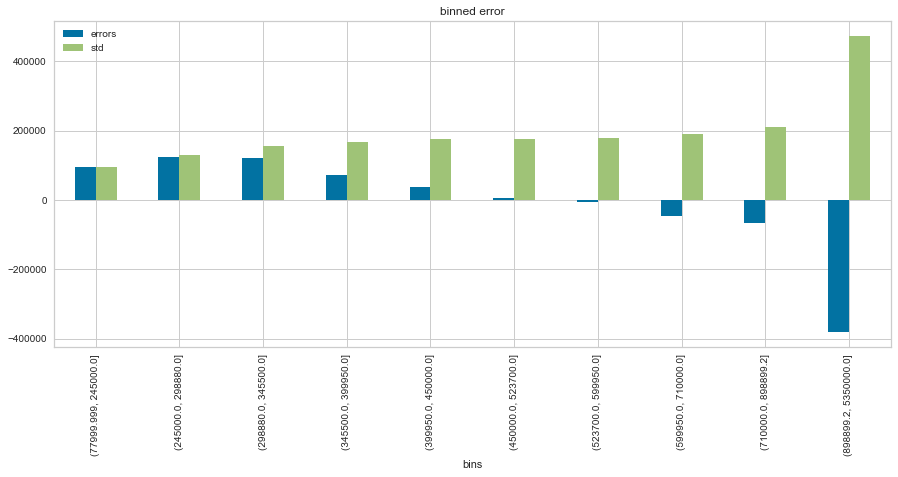

In [18]:
#set X & y variables
X = df.drop(['price'], axis = 1)
y = df['price']

#establish the features list
model_features = ['sqft_living']

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

#call the function (rename the output file every time)
model_1_results = sale_reg(X_train, X_test, y_train, y_test, model_features)
model_1_results

### call model 2

In [20]:
df_2 = df.copy()
#do df manipulations here

train error 226809.31637243807
test error 225347.17138653962
difference: -1462.144985898456
coefficient of determination: 0.6180358986328702
intercept: -3908662.1411975375
          feature        weight
0       intercept -3.908662e+06
1        bedrooms -5.535659e+04
2       bathrooms  5.299249e+04
3     sqft_living  1.992216e+02
4        sqft_lot -3.758423e-03
5          floors  3.318063e+04
6       condition  1.906736e+04
7           grade  1.251580e+05
8      sqft_above -2.763921e+01
9        yr_built -3.918297e+03
10        zipcode  1.096098e+02
11  sqft_living15  3.206107e+01
12     sqft_lot15 -5.386288e-01


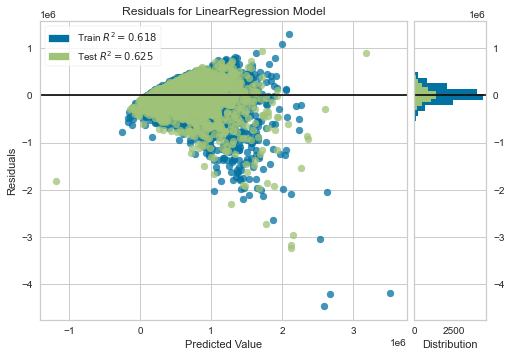

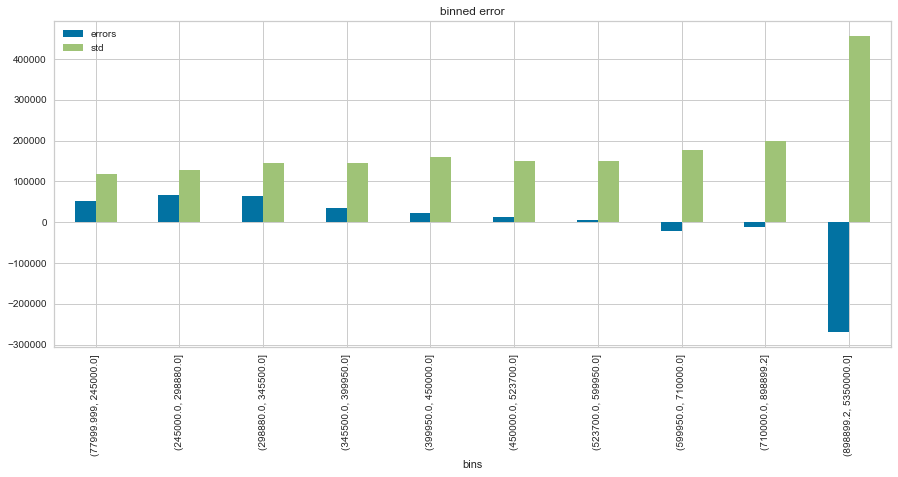

In [22]:
#set X & y variables
X = df_2.drop(['price'], axis = 1)
y = df_2['price']

#establish the features list
model_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15']

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

#call the function (rename the output file every time)
model_2_results = sale_reg(X_train, X_test, y_train, y_test, model_features)
model_2_results